In [1]:
 # Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

    



In [2]:
all_file ="../YTSpotify/all_data.csv"

# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
all_df = pd.read_csv(all_file, encoding="ISO-8859-1")

#all_df.head()


In [3]:
# Organize the columns so they are in a more logical order
all_df = all_df[[
    "artists", "year","popularity",  "acousticness", "danceability", "duration_ms", "energy", 
    "instrumentalness", "liveness", "loudness", "name", "release_date",
    "speechiness", "tempo", "valence" ]]

# Rename columns for readability
all_df = all_df.rename(columns={"artists": "Artists", "year": "Year", "acousticness": "Acousticness", 
                                "danceability": "Danceability", "duration_ms": "Duration", "energy": "Energy", 
                                "instrumentalness": "Instrumentalness", "liveness": "Liveness", 
                                "loudness": "Loudness", "name": "Song", 
                                "popularity": "Popularity", "release_date": "Release Date",
                                "speechiness": "Speechiness", "tempo": "Tempo", "valence": "Valence"})

#reset index
all_df.reset_index(drop=True, inplace=True)

#all_df.head()




In [4]:
#sort by popularity
popularity_df = all_df.sort_values(by='Popularity', ascending=False)

#top 50 songs
top_50 = popularity_df.head(50)
#top_50

/Users/Jillian_Gonder/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Jillian_Gonder/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)


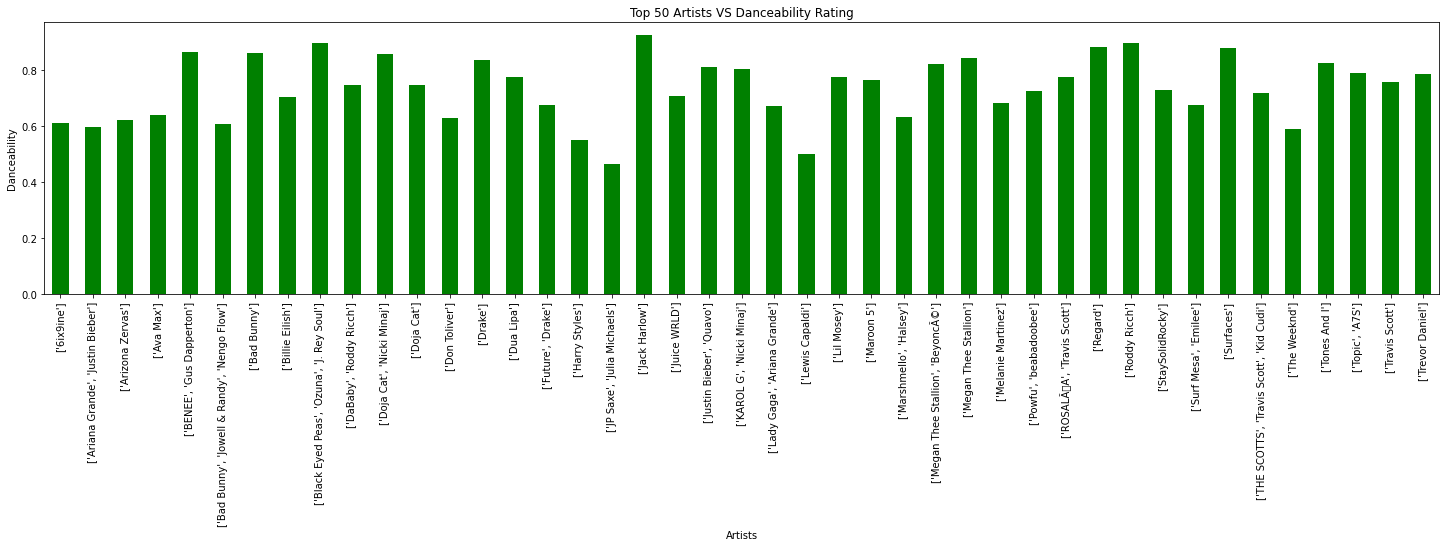

In [16]:
#top 50 artists Vs Danceability - alphabetical order
plt.rcParams["figure.figsize"] = [25, 5]
plt.xlim(-1,43)
artists = top_50.groupby('Artists')['Danceability'].mean()
artists.plot(kind='bar', color="green")
plt.title("Top 50 Artists VS Danceability Rating")
plt.xlabel("Artists")
plt.ylabel("Danceability")
plt.savefig("../YTSpotify/Images/top_artists.png", bbox_inches="tight")
plt.show()

In [6]:
#top 50 artists Vs Danceability - starting at number 1
#y_axis = top_50["Danceability"]
#x_axis = top_50["Artists"]

#plt.rcParams["figure.figsize"] = [25, 5]
#plt.xlim(-1,43)
#plt.bar(x_axis, y_axis, color='green', align="center")
#plt.xticks(x_axis, rotation='vertical')
#plt.title("Top 50 Artists VS Danceability Rating")
#plt.xlabel("Artists")
#plt.ylabel("Danceability")
#plt.savefig("../YTSpotify/Images/top_artists.png", bbox_inches="tight")
#plt.show()

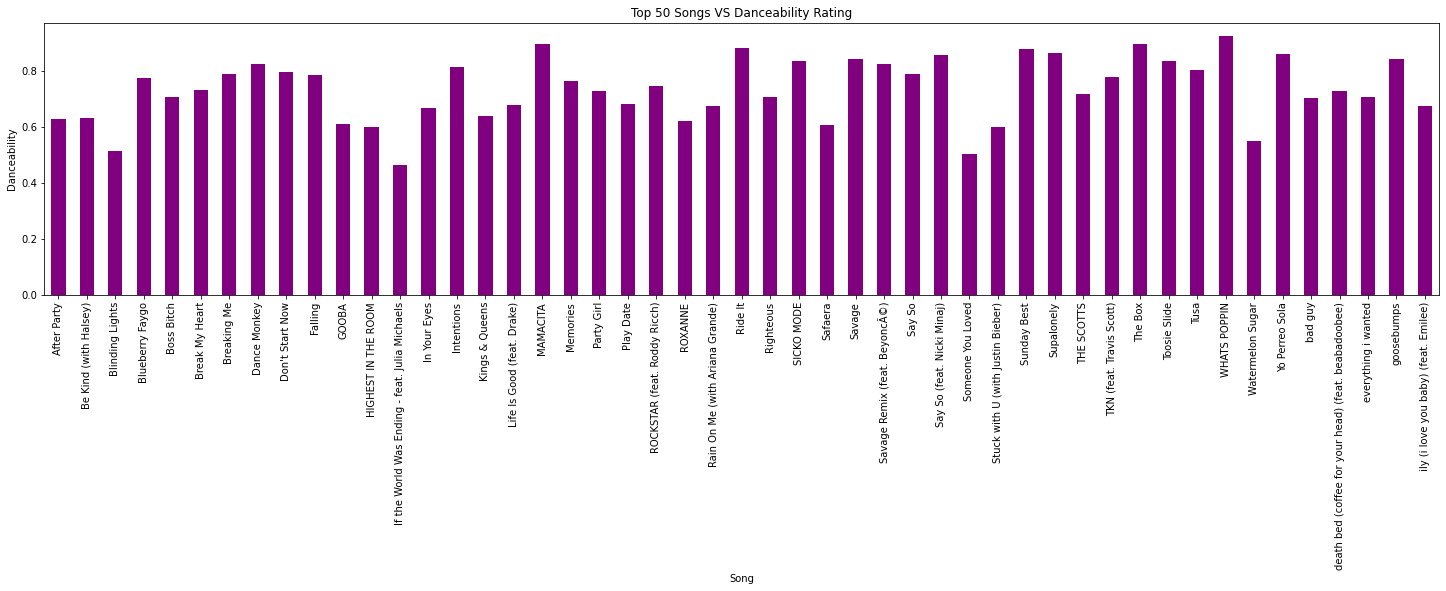

In [7]:
#top 50 artists Vs Danceability - alphabetical order
songs = top_50.groupby('Song')['Danceability'].mean()
songs.plot(kind='bar', color="purple")
plt.title("Top 50 Songs VS Danceability Rating")
plt.xlabel("Song")
plt.ylabel("Danceability")
plt.savefig("../YTSpotify/Images/top_artists.png", bbox_inches="tight")
plt.show()

In [8]:
#top 50 songs vs danceability
#y_axis = top_50["Danceability"]
#x_axis = top_50["Song"]

#plt.rcParams["figure.figsize"] = [35, 5]
#plt.xlim(-1,49)
#plt.bar(x_axis, y_axis, color='purple', align="center")
#plt.xticks(x_axis, rotation='vertical')
#plt.title("Top 50 Songs VS Danceability Rating")
#plt.xlabel("Songs")
#plt.ylabel("Danceability")
#plt.savefig("../YTSpotify/Images/top_songs.png", bbox_inches="tight")
#plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

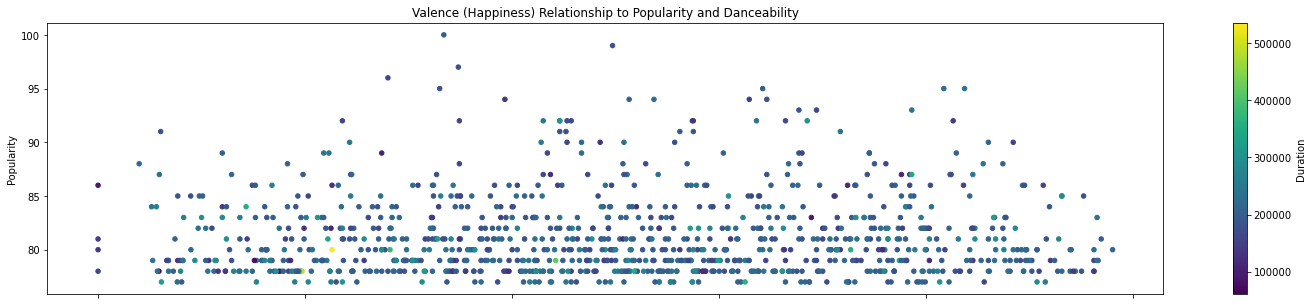

In [9]:
#Valence (happiness) of Song Vs Popularity colors = duration = top 1000
top_1000 = popularity_df.head(1000)
valence = top_1000.plot.scatter(x='Valence',
                      y='Popularity',
                       c='Duration',
                      colormap='viridis')

plt.title("Valence (Happiness) Relationship to Popularity and Danceability")
plt.savefig("../YTSpotify/Images/Valence_scatter.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

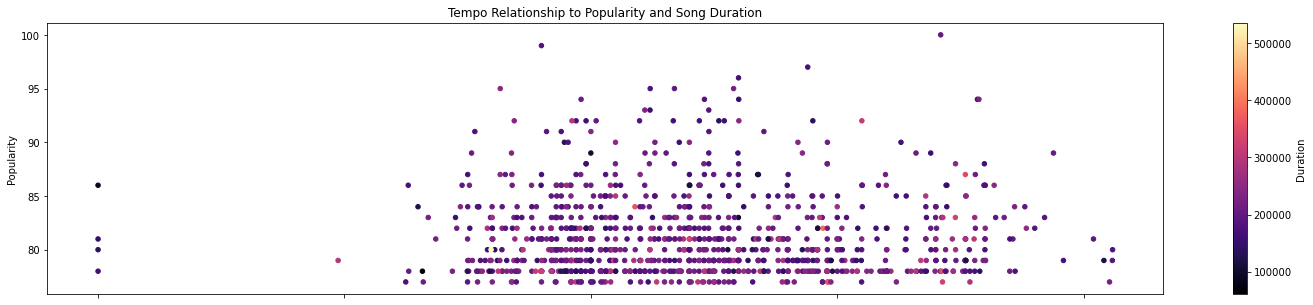

In [10]:
#temp0 relationship to popularity and duration
top_1000 = popularity_df.head(1000)
tempo = top_1000.plot.scatter(x='Tempo',
                      y='Popularity',
                       c='Duration',
                      colormap='magma')

plt.title("Tempo Relationship to Popularity and Song Duration")
plt.savefig("../YTSpotify/Images/Tempo_scatter.png")
plt.show

In [11]:
genre_file ="../YTSpotify/data_by_genres.csv"

# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
genre_df = pd.read_csv(genre_file, encoding="ISO-8859-1")

#genre_df.head()



In [12]:
genre_df = genre_df[["genres", "popularity", "valence", "danceability"]]

# Rename columns for readability
genre_df = genre_df.rename(columns={"genres": "Genre",  "danceability": "Danceability",  
                                "popularity": "Popularity", "valence": "Valence"})

#reset index
genre_df.reset_index(drop=True, inplace=True)

#sort by popularity
genre_df = genre_df.sort_values(by='Popularity', ascending=False)

#top 1000 by genre
genre_top_1000 = genre_df.head(1000)
#genre_top_1000

<function matplotlib.pyplot.show(*args, **kw)>

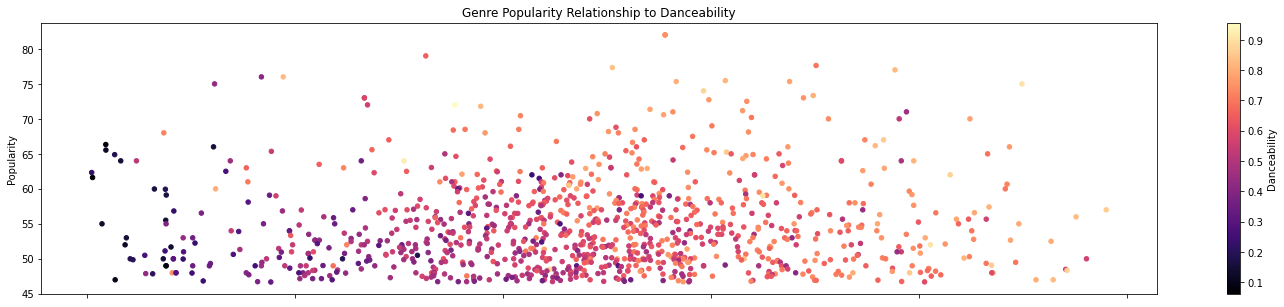

In [13]:
#Valence (happiness) of Genre Vs Popularity and relationship to colors = danceability, top 1000
genre_valence = genre_top_1000.plot.scatter(x='Valence',
                      y='Popularity',
                       c='Danceability',
                      colormap='magma')
plt.title("Genre Popularity Relationship to Danceability")
plt.savefig("../YTSpotify/Images/Genre_scatter.png")
plt.show

In [14]:
#top 5000 songs
top_5000 = popularity_df.head(5000)
top_5000

# Organize the columns so they are in a more logical order
release_df = top_5000[["Year","Release Date", "Popularity","Artists", "Song" ]]


#reset index
release_df.reset_index(drop=True, inplace=True)

# extract month
release_df['Month'] = pd.DatetimeIndex(release_df['Release Date']).month

#release_df.head()





<ipython-input-14-3470fcaa430e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  release_df['Month'] = pd.DatetimeIndex(release_df['Release Date']).month


<function matplotlib.pyplot.show(*args, **kw)>

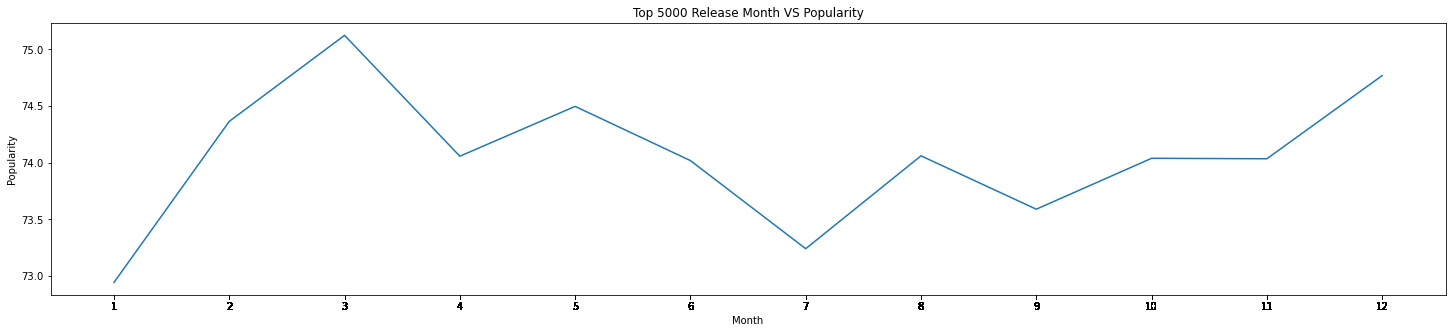

In [15]:
#line graph of month release vs popularity in top 5000
x = release_df.groupby('Month')['Popularity'].mean()
x.plot(kind='line')
plt.xticks(release_df["Month"])
plt.title("Top 5000 Release Month VS Popularity")
plt.xlabel("Month")
plt.ylabel("Popularity")
plt.savefig("../YTSpotify/Images/Release_line.png")
plt.show